 Инструкция по выполнению проекта:

Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У вас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отричательно влияют на привлечение пользователей.

Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. Скачать датасет
 -   /datasets/orders_info_short.csv. Скачать датасет
 -   /datasets/costs_info_short.csv. Скачать датасет
 
Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

Шаг 4. Маркетинг
Выясните:

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

Подумайте, нужно ли включать в анализ органических пользователей?

Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

 Оформление: 
Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.


Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

## Шаг 1. Загрузка данных и подготовка их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

### Загрузка данных и библиотек

Для начала стоит импортировать все нужные библиотеки:

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

pd.set_option('display.max_columns', None)

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

### Данные таблицы visits

Кратко пробежимся по таблице с данными о визитах на ресурс и внесем нужные изменения, если они нужны

In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
User Id          309901 non-null int64
Region           309901 non-null object
Device           309901 non-null object
Channel          309901 non-null object
Session Start    309901 non-null object
Session End      309901 non-null object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Отметим, что названия столбцов написаны с заглавной буквы, а также отсутствует нижнее подчеркивание. Нужно это изменить. Так как данная проблема во всех таблицах, то создадим функцию.

In [5]:
def make_better_columns(df):
    df.columns = df.columns.str.lower()
    df.columns = [col.replace(" ", "_") for col in df.columns]
    return df

In [6]:
visits = make_better_columns(visits)

In [7]:
visits.head(1)

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01


Данные в столбцах отвечающих за время нужно привести к нужному типу.

In [8]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_start'])

### Данные таблицы orders

In [9]:
orders.head(3)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
User Id     40212 non-null int64
Event Dt    40212 non-null object
Revenue     40212 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [11]:
orders = make_better_columns(orders)

Измени тип данных в строке со временем:

In [12]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [13]:
orders.head(1)

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99


### Данные таблицы costs

In [14]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [15]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null object
Channel    1800 non-null object
costs      1800 non-null float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [16]:
costs = make_better_columns(costs)

In [17]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [18]:
costs.head(1)

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3


### Вывод о данных

- Данные не имеют дубликатов и пропусков. 
- Столбцы со временем требуется привести к нужному виду
- Названия столбцов требуют изменений

## Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

### Функция получения профилей

In [19]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


### Функция получения Retention Rate

In [20]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция получения Conversion

In [21]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для рассчета LVT и ROI

In [22]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функция для сглаживания фрейма

In [23]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Функция для визуализации Retention Rate

In [24]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

### Функция для визуализации Conversion

In [25]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Функция для визуализации LTV и ROI

In [26]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

### Составим таблицу с профилями позьзователей

In [27]:
profiles = get_profiles(visits, orders, None, costs)

In [28]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


- Минимальная дата привлечения пользователей

In [29]:
min_date = profiles['dt'].min()
print('Минимальная дата привлечения - {}'.format(min_date))

Минимальная дата привлечения - 2019-05-01


- Максимальная дата привлечения пользователей

In [30]:
max_date = profiles['dt'].max()
print('Максимальная дата привлечения - {}'.format(max_date))

Максимальная дата привлечения - 2019-10-27


### Страны-лидеры по доле покупок

In [31]:
countries_leaders = (
profiles.groupby('region')
    .agg({'user_id':'nunique','payer':['sum','mean']})
    .sort_values(by=('payer','mean'),ascending=False)
)

In [32]:
countries_leaders.columns = countries_leaders.columns.droplevel()
countries_leaders.columns = ['Кол-во пользователей', 'Кол-во платящих', '% платящих']
countries_leaders.style.format({('% платящих'):'{:.2%}'})

,Кол-во пользователей,Кол-во платящих,% платящих
region,,,
United States,100002,6902,6.90%
Germany,14981,616,4.11%
UK,17575,700,3.98%
France,17450,663,3.80%


Для того чтобы легче было расшифровать какая доля пользователей является из каждой страны является покупателем предлагаю построить график

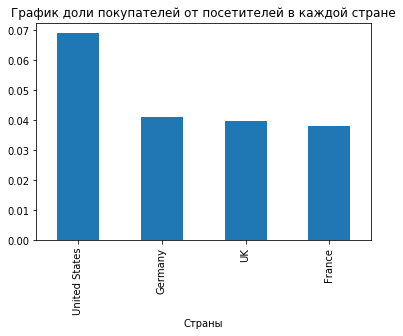

In [33]:
countries_leaders['% платящих'].plot(kind='bar')
plt.title('График доли покупателей от посетителей в каждой стране')
plt.xlabel('Страны')
plt.show()

### Девайсы лидеры по доле покупок

In [34]:
countries_leaders = (
profiles.groupby('device')
    .agg({'user_id':'nunique','payer':['sum','mean']})
    .sort_values(by=('payer','mean'),ascending=False)
)
countries_leaders.columns = countries_leaders.columns.droplevel()
countries_leaders.columns = ['Кол-во пользователей', 'Кол-во платящих', '% платящих']
countries_leaders.style.format({('% платящих'):'{:.2%}'})

,Кол-во пользователей,Кол-во платящих,% платящих
device,,,
Mac,30042,1912,6.36%
iPhone,54479,3382,6.21%
Android,35032,2050,5.85%
PC,30455,1537,5.05%


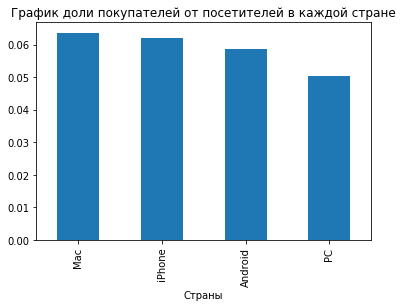

In [35]:
countries_leaders['% платящих'].plot(kind='bar')
plt.title('График доли покупателей от посетителей в каждой стране')
plt.xlabel('Страны')
plt.show()

### Каналы-лидеры по доле покупок

In [36]:
countries_leaders = (
profiles.groupby('channel')
    .agg({'user_id':'nunique','payer':['sum','mean']})
    .sort_values(by=('payer','mean'),ascending=False)
)
countries_leaders.columns = countries_leaders.columns.droplevel()
countries_leaders.columns = ['Кол-во пользователей', 'Кол-во платящих', '% платящих']
countries_leaders.style.format({('% платящих'):'{:.2%}'})

,Кол-во пользователей,Кол-во платящих,% платящих
channel,,,
FaceBoom,29144,3557,12.20%
AdNonSense,3880,440,11.34%
lambdaMediaAds,2149,225,10.47%
TipTop,19561,1878,9.60%
RocketSuperAds,4448,352,7.91%
WahooNetBanner,8553,453,5.30%
YRabbit,4312,165,3.83%
MediaTornado,4364,156,3.57%
LeapBob,8553,262,3.06%


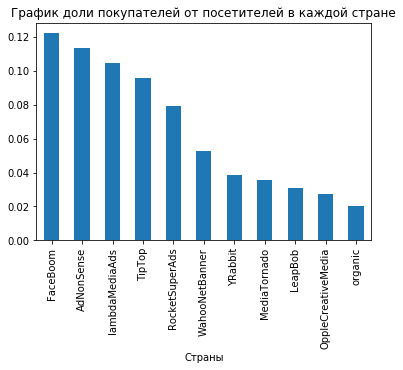

In [37]:
countries_leaders['% платящих'].plot(kind='bar')
plt.title('График доли покупателей от посетителей в каждой стране')
plt.xlabel('Страны')
plt.show()

### Выводы

- Наибольшая доля покупателей находится в USA
- Наибольшая доля покупателей осуществляют покупки с Mac и iPhone, однако разница по сравнению с другими устройствами не слишком велика
- Наибольшая доля платящих пользователей приходит с FaceBoom

## Шаг 4. Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

### Анализ траты средств

- Всего было потрачено на рекламу:

In [38]:
round(profiles['acquisition_cost'].sum(), 2)

105497.3

- Всего было потрачено на каждый источник:

In [39]:
profiles.groupby('channel').agg({'acquisition_cost':'sum'}).sort_values(ascending=False, by='acquisition_cost')

,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

<b>Ян:</b> Точно, совсем забыл про два графика, все исправил
</div>

- График расходов помесячно

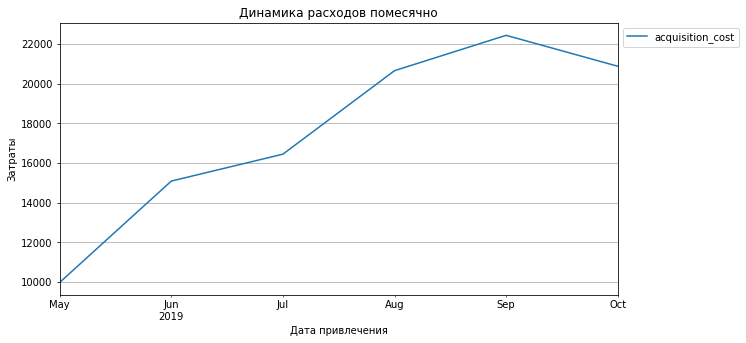

In [40]:
profiles.groupby('month')['acquisition_cost'].sum().plot(grid=True, figsize=(10, 5))
plt.ylabel('Затраты')
plt.xlabel('Дата привлечения')
plt.title('Динамика расходов помесячно')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()

- График изменения рекламных расходов

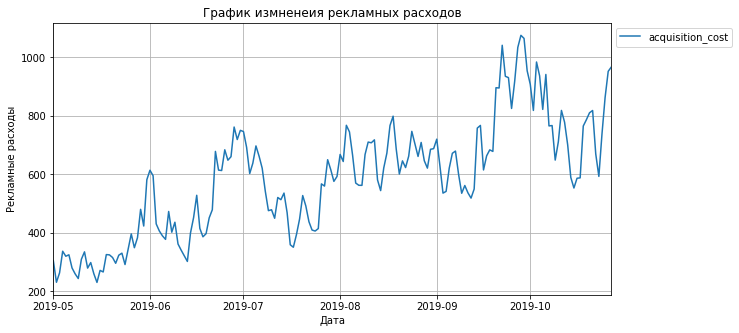

In [41]:
profiles.groupby('dt')['acquisition_cost'].sum().plot(grid=True, figsize=(10, 5))
plt.ylabel('Рекламные расходы')
plt.xlabel('Дата')
plt.title('График измненеия рекламных расходов')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()

- График по времени для каналов

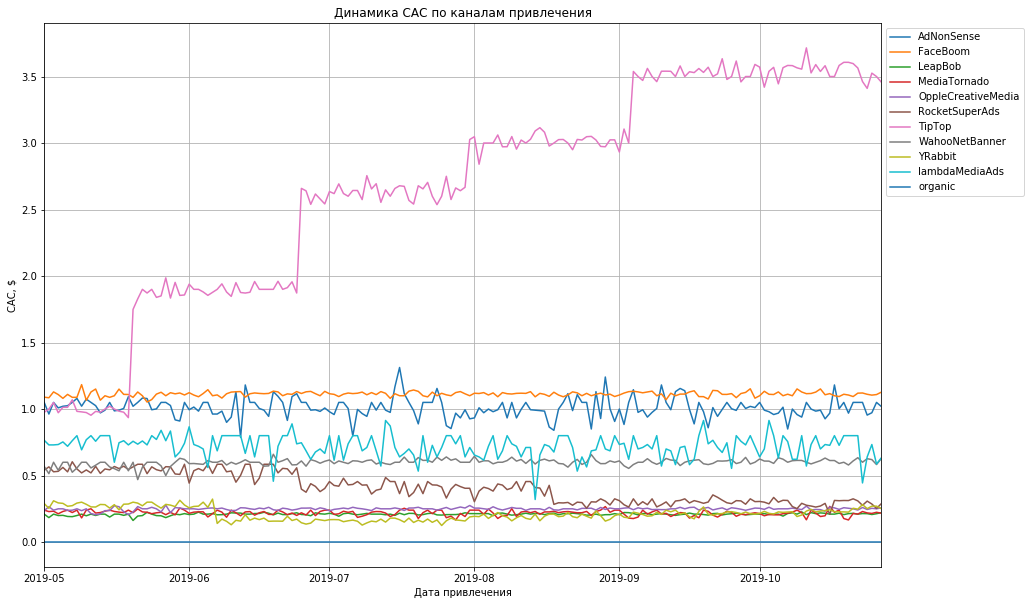

In [42]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(15, 10))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()

- График по времени за каждый месяц для каналов

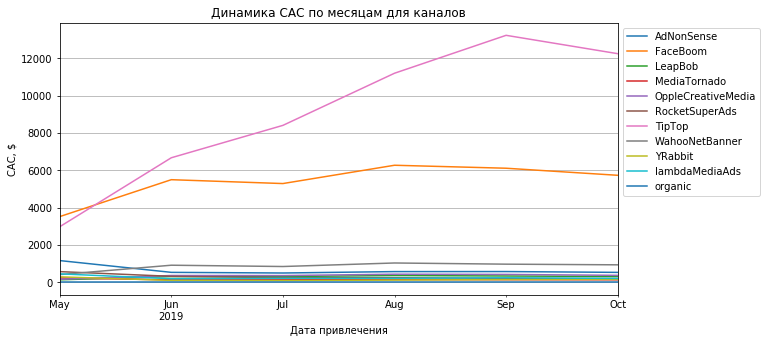

In [43]:
profiles.pivot_table(
    index='month', columns='channel', values='acquisition_cost', aggfunc='sum'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по месяцам для каналов')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()

### Средняя стомость привлечения покупателя из каждого источника

- Средний CAC для каждого источника

In [44]:
profiles.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


- Средний CAC для всего проекта

In [45]:
profiles['acquisition_cost'].mean()

0.7032778251826568

- Средний CAC для всего проекта без органики

In [46]:
profiles[profiles['channel']!='organic']['acquisition_cost'].mean()

1.1274813239427588

### Выводы

- Наибольшее кол-во денег было потрачено на FaceBoom и Tip-Top
- Динамика CAC растет, начиная с июня
- Средняя стоимость привлечения каждого покупателя больше всего в канале TipTop и FaceBoom
- Органические пользователи снижают CAC по проекту на 1/3

## Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Проанализируйте общую окупаемость рекламы

Установим момент и горизонт анализа

In [47]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

Так как мы просматриваем окупаемость рекламы, то лучше исключить органических пользователей, чтобы они не добавляли лишние шумы.

In [48]:
profiles = profiles.query('channel != "organic"')

In [49]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

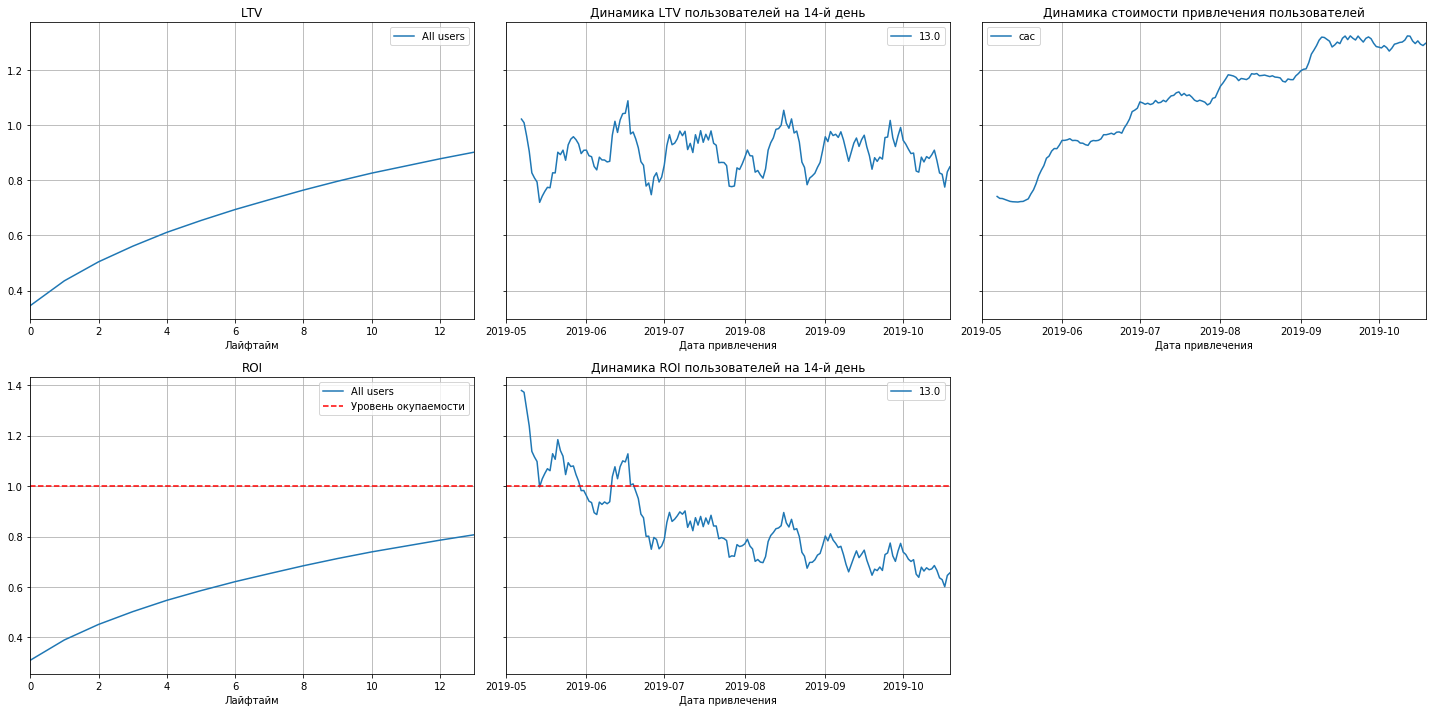

In [50]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

- Реклама перестала окупаться в середине мая
- LTV имеет сезонный характер, однако этот показатель достаточно стабилен
- Стоимость привлечения пользователей резко выросла в два раза по сравнению с майскими показателями.

### Проанализируйте окупаемость рекламы с разбивкой по каналам

In [51]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

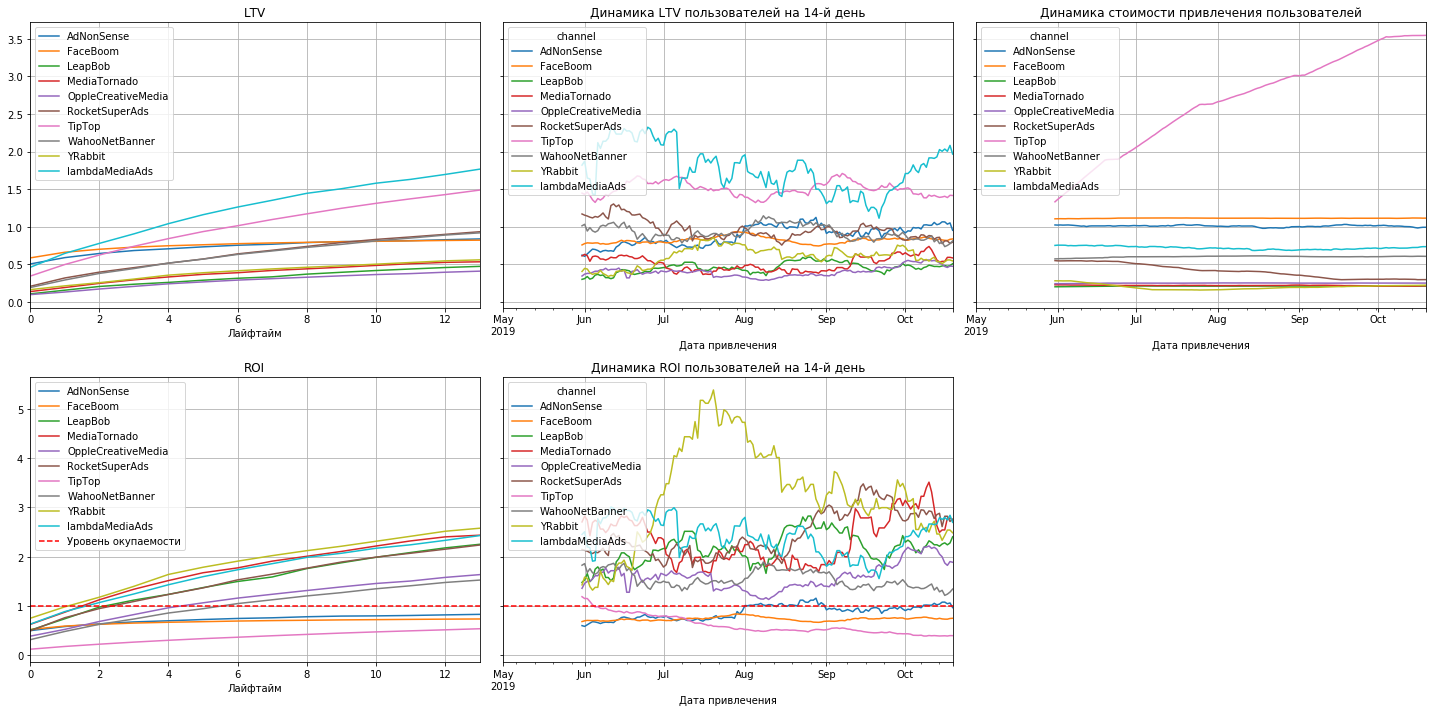

In [52]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=31
) 

- Стоимость привлечения через канал TipTop резко выросла в два раза начиная с июня
- Также канал TipTop окупается нижен любого другого канала
- Среди каналов по ROI лидирует YRabbit

### Проанализируйте окупаемость рекламы с разбивкой по странам

In [53]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

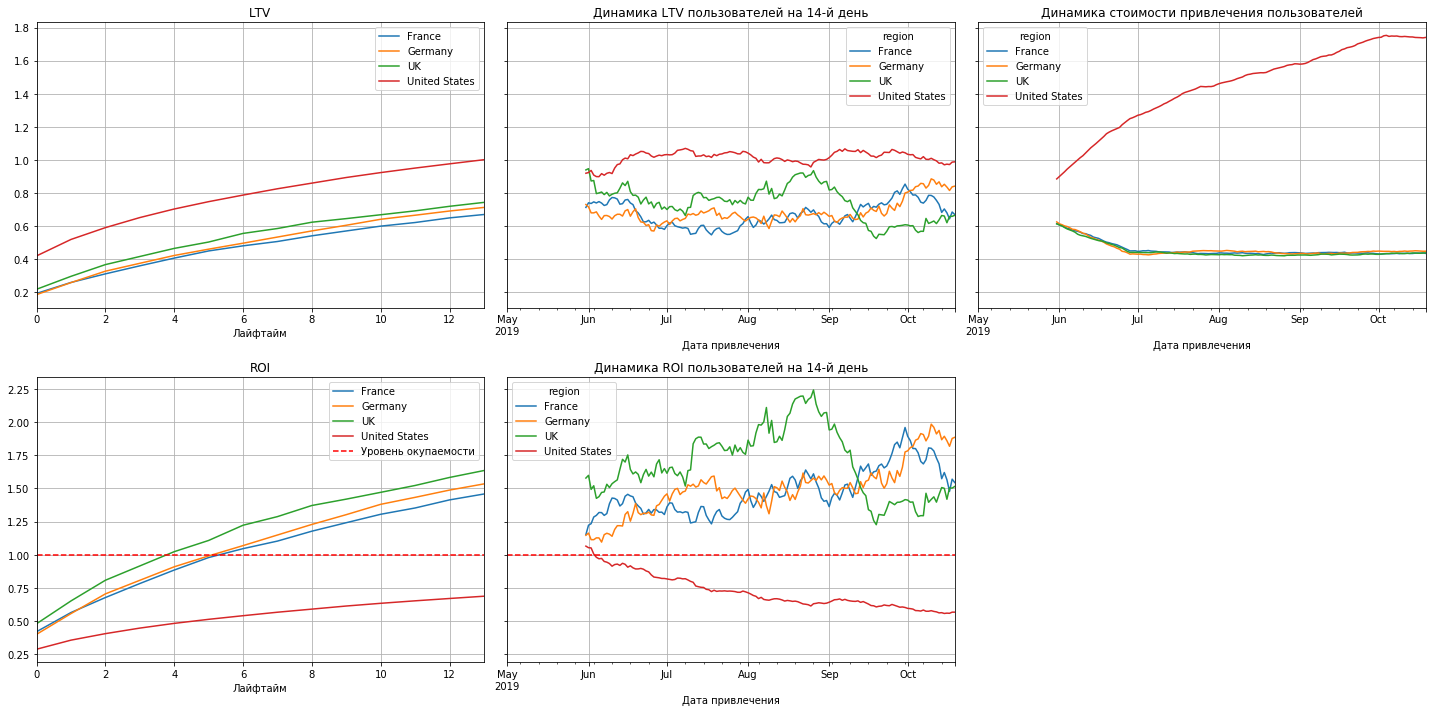

In [54]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=31
) 

- USA не окупается по ROI и резко начинает падать с июня.
- Стоимость привлечения пользователей в соединенных штатах резко выросла в два раза начиная с июня, однако в других странах выросла
- Однако LTV пользователей из USA самы высокий.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

In [55]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

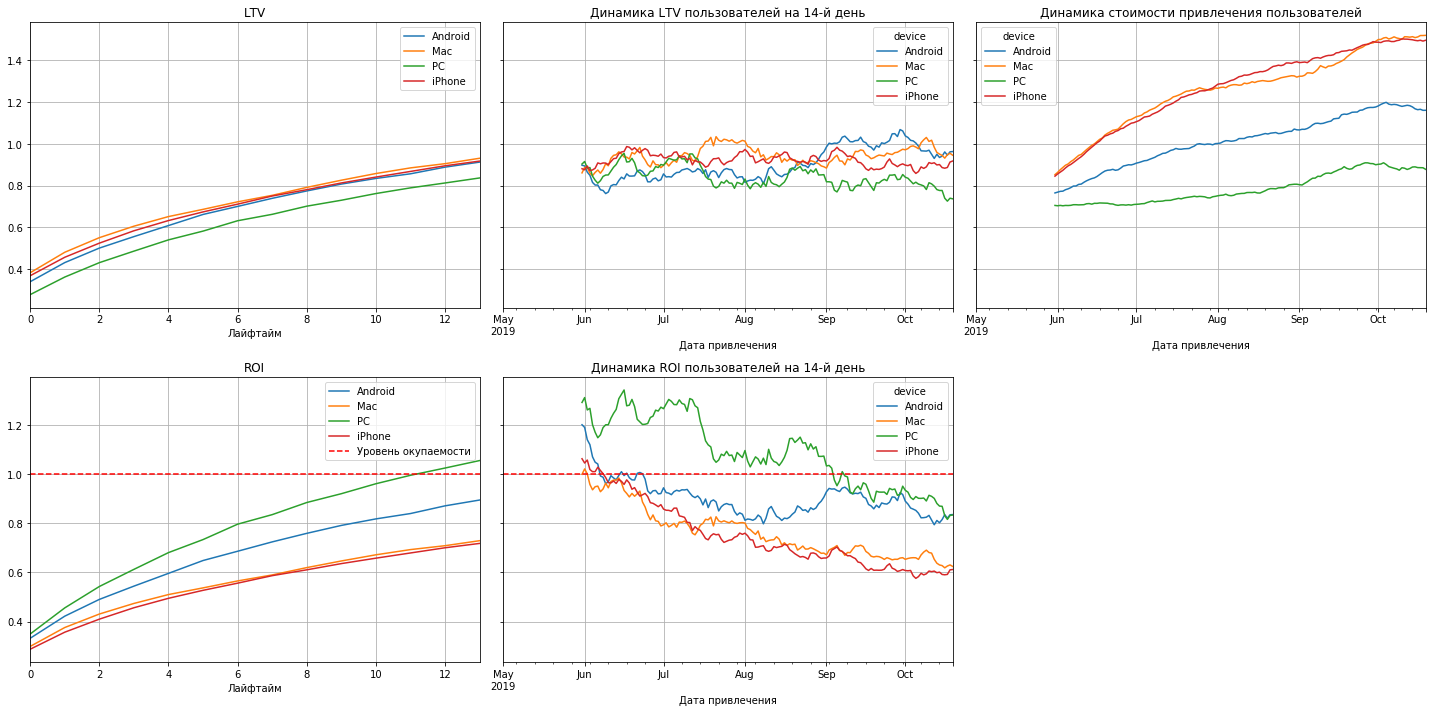

In [56]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=31
) 

- Стоимость привлечения пользоваталей растет по всем устройствам, однако самый активный рост наблюдается у iPhone и Mac
- Окупается реклама только для пользователей PC
- Динамика ROI стабильно падает для всех устройств с июня, однако для iPhone и Mac показывает самые быстрый спад.

### Анализ удержания и конверсий по устройствам

#### Удержание

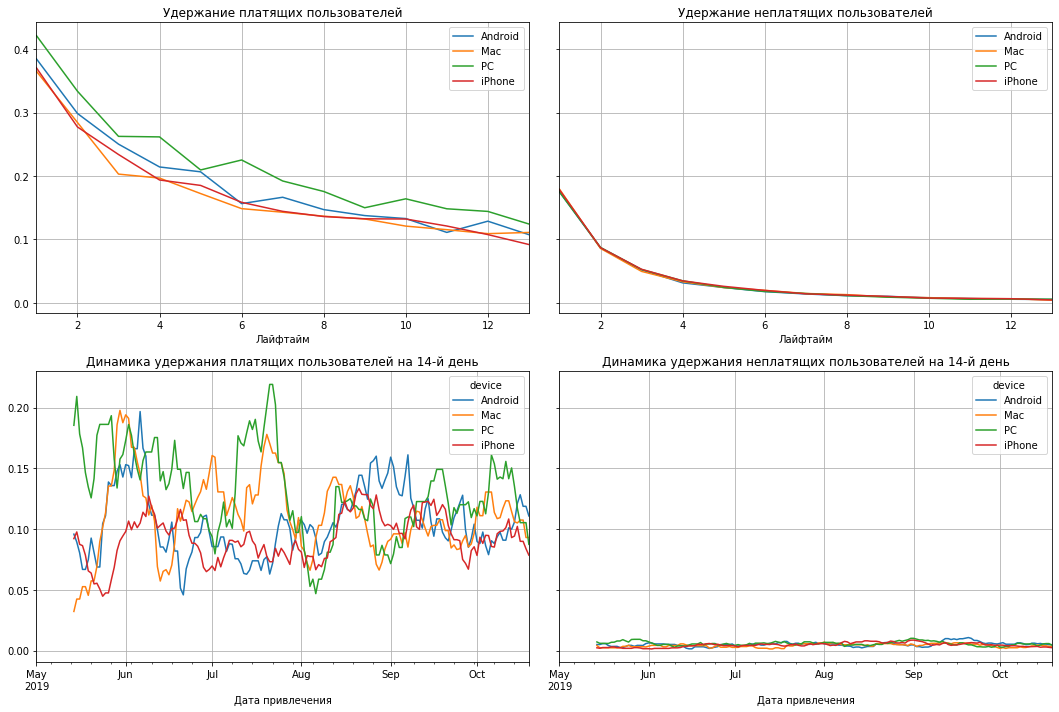

In [57]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days, window=14) 

- Удержание стабильно и без аномалий по всем устройствам для платящих и не платящих пользователей

#### Конверсии

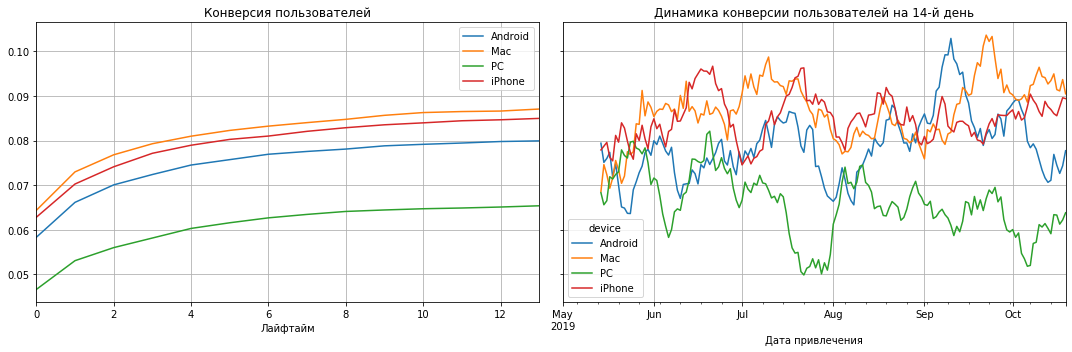

In [58]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14) 

- У пользователей iPhone и Mac самые высокие показатели конверсии

### Анализ удержания и конверсий по регионам

#### Удержание

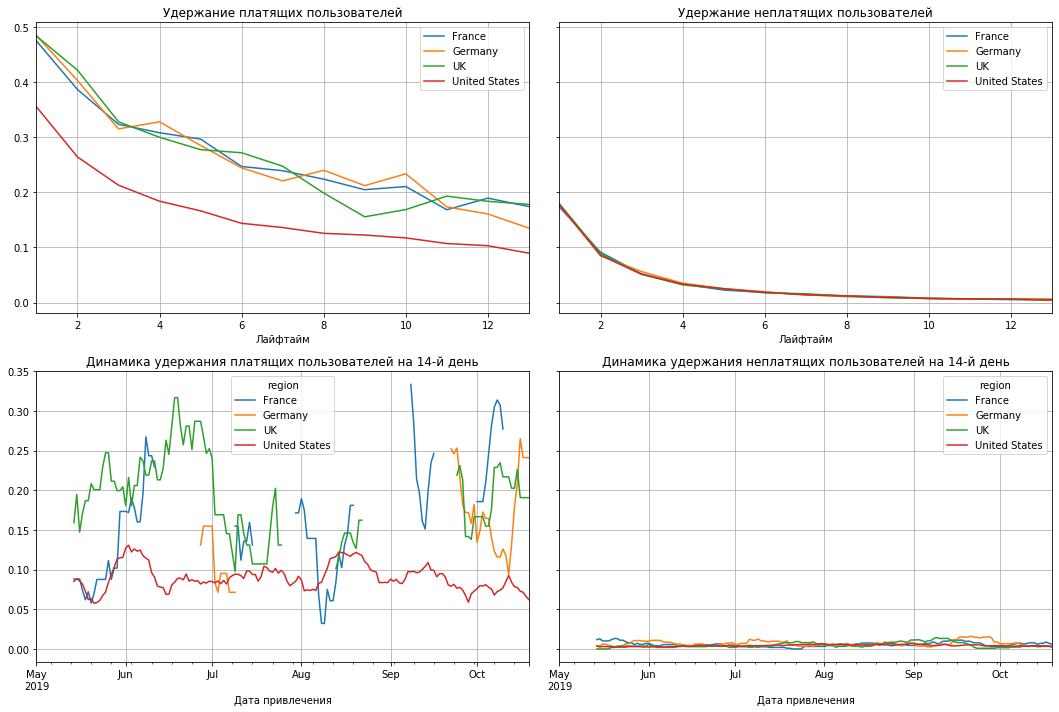

In [59]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days, window=14) 

- Удержание платящих пользователей ниже в USA
- Динамика удержания платящих пользователей на 14-день имеет рваный характер (Данные о когортах либо потеряны, либо такие когорты не получилось собрать). USA стабильно показывает самые низкие показатели, но не имеет рваного характера.

#### Конверсии

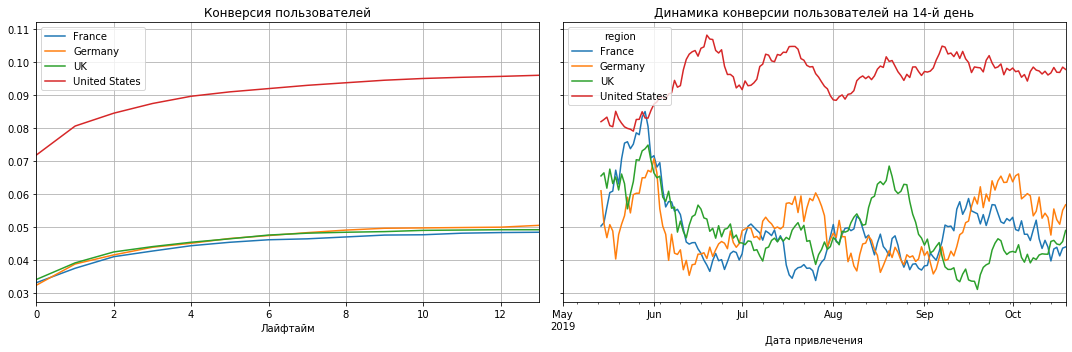

In [60]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14) 

- Конверсии пользователей самые высокие в USA

### Анализ удержания и конверсии по каналам

#### Удержание

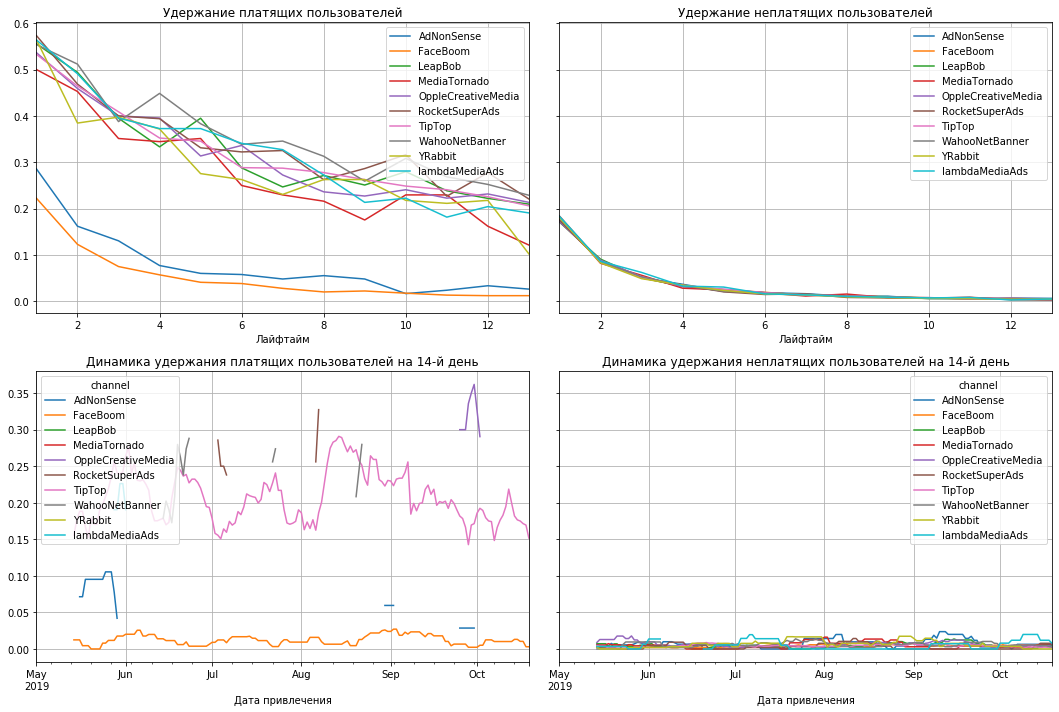

In [61]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days, window=14) 

- Удержание платящих пользователей предельно низкое по сравнению с другими каналами для AdNonSense и FaceBoom
- Удержание платящих пользователей на 14-ый день предельно низкая для FaceBoom

#### Конверсии

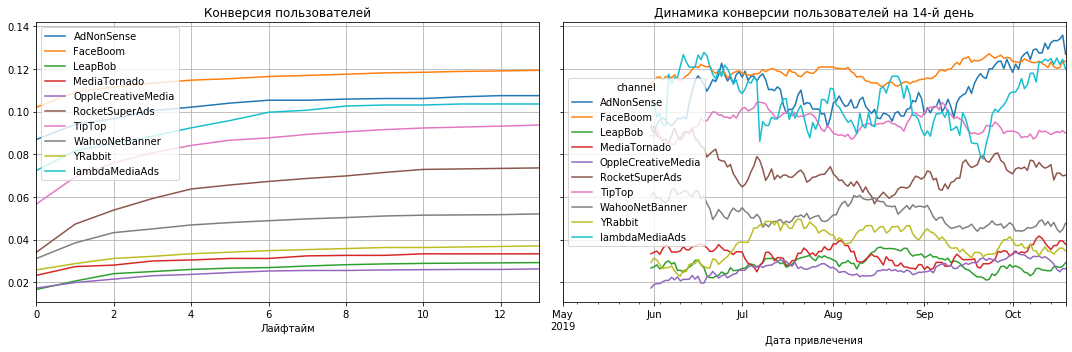

In [62]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=31) 

- Конверсии для FaceBoom самые высокие

### Выводы по шагу

- В целом реклама не окупается
- Устройства, которые могут снижать окупаемость рекламы: iPhone, Mac и Android (последнее в меньшей степени), однако конверсии по iPhone и Mac самые высокие. Одна из возможных причин: Динамика стоимости привлечения по данным устройствам постоянно растет. 
- Каналы, которые могут снижать окупаемость рекламы: TipTop, FaceBoom и AdNonSense, однако эти каналы показывают самые высокие показатели конверсии. Одна из возможных причин: Динамика стоимости привлечения по TipTop непрерывно растет. Удержание по платящим и неплатящим пользователям по FaceBoom и AdNonSense одинаково низкое, что свидетельствует о низком качестве пользователей. 
- Регионы, которые могут снижать окупаемость рекламы: США, однако опять же этот регион показывает самый высокий показатель конверсии. Одна из возможных причин: Динамика стоимости привлечения по USA непрерывно растет

### Исследование района USA

- Отфильтруем данные по неорганичесим пользователям, которые живут в США

In [63]:
usa = profiles.query('channel != "organic" and region == "United States"')

#### LTV, ROI

In [64]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    usa, orders, observation_date, horizon_days, dimensions=['channel']
)

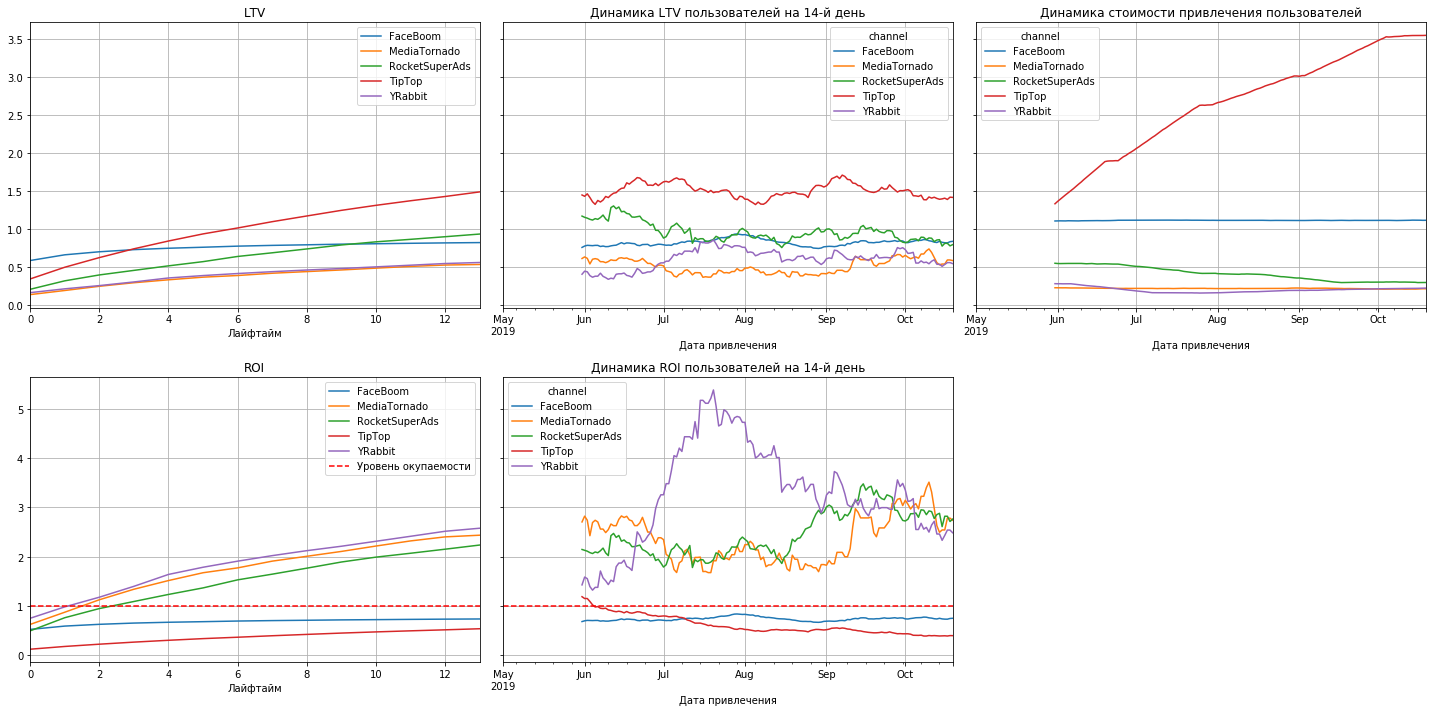

In [65]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=31
) 

- Окупаемости каналов FaceBoom и TipTop не происходит
- LTV по каналу TipTip самое высокое
- CAC по TipTop постоянно повышается, начиная с июня
- FaceBoom стабильно остается дорогим выше среднего уровня

#### Удержание по каналам

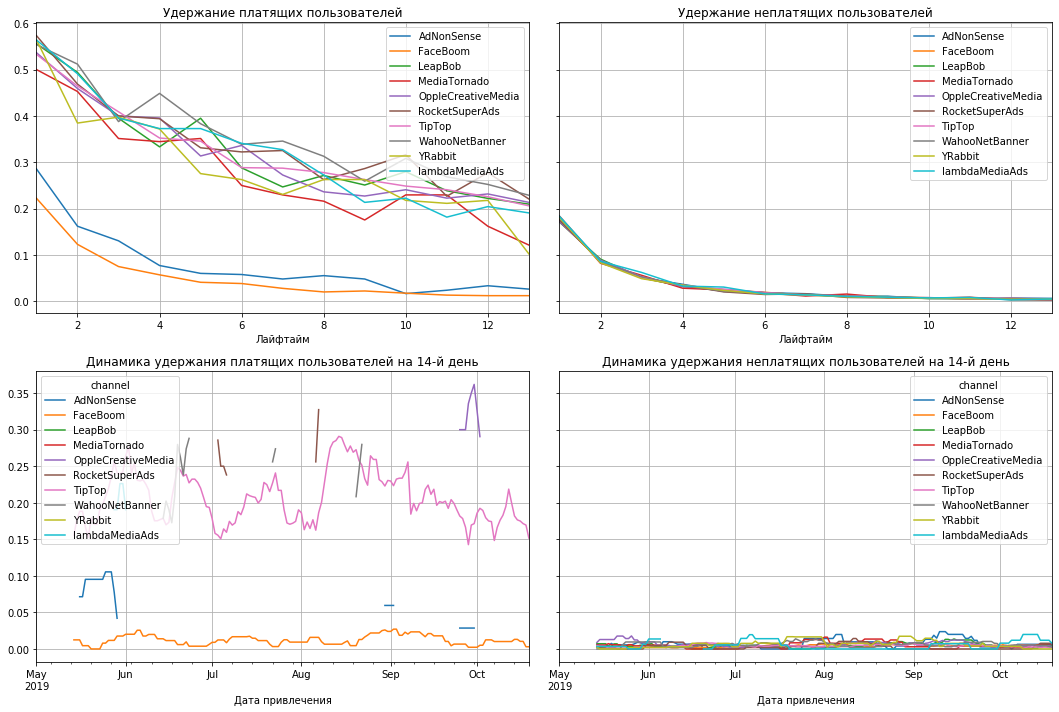

In [66]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days, window=14) 

- Удержание платящих пользователей по FaceBoom и AdNonSense низкое по сравнению с другими каналами
- TipTop показывает высокие показатели динамики удержания
- Удержание для FaceBoom по 14-му дню предельно низкое

#### Конверсия по каналам

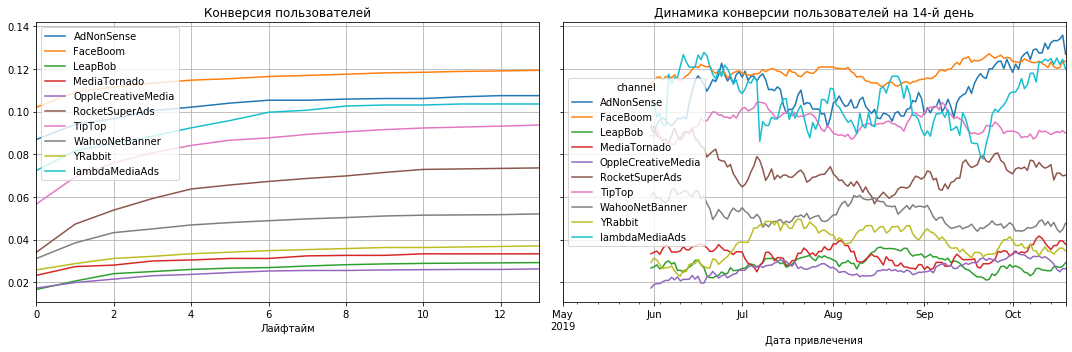

In [67]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=31) 

- FaceBoom показывает самые высокие показатели конверсии

## Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

### Выводы по проекту и причины неэффективности привлечения пользователей:

- Данные не имеют дубликатов и пропусков. 
- Столбцы со временем требуется привести к нужному виду
- Названия столбцов требуют изменений
- ---------------------------------------------------------------------------------------------------
- Наибольшая доля покупателей находится в USA
- Наибольшая доля покупателей осуществляют покупки с Mac и iPhone, однако разница по сравнению с другими устройствами не слишком велика
- Наибольшая доля платящих пользователей приходит с FaceBoom
-
- Наибольшее кол-во денег было потрачено на FaceBoom и Tip-Top
- Динамика CAC растет, начиная с июня
- Средняя стоимость привлечения каждого покупателя больше всего в канале TipTop и FaceBoom
- Органические пользователи снижают CAC по проекту на 1/3
- ---------------------------------------------------------------------------------------------------
- Реклама перестала окупаться в середине мая
- LTV имеет сезонный характер, однако этот показатель достаточно стабилен
- Стоимость привлечения пользователей резко выросла в два раза по сравнению с майскими показателями.
- Стоимость привлечения через канал TipTop резко выросла в два раза начиная с июня
- Также канал TipTop окупается нижен любого другого канала
- Среди каналов по ROI лидирует YRabbit
- USA не окупается по ROI и резко начинает падать с июня.
- Стоимость привлечения пользователей в соединенных штатах резко выросла в два раза начиная с июня, однако в других странах выросла
- Однако LTV пользователей из USA самы высокий.
- Стоимость привлечения пользоваталей растет по всем устройствам, однако самый активный рост наблюдается у iPhone и Mac
- Окупается реклама только для пользователей PC
- Динамика ROI стабильно падает для всех устройств с июня, однако для iPhone и Mac показывает самые быстрый спад.
- ---------------------------------------------------------------------------------------------------
- Удержание стабильно и без аномалий по всем устройствам для платящих и не платящих пользователей
- У пользователей iPhone и Mac самые высокие показатели конверсии
- Удержание платящих пользователей ниже в USA
- Динамика удержания платящих пользователей на 14-день имеет рваный характер (Данные о когортах либо потеряны, либо такие когорты не получилось собрать). USA стабильно показывает самые низкие показатели, но не имеет рваного характера.
- Конверсии пользователей самые высокие в USA- Удержание платящих пользователей предельно низкое по сравнению с другими каналами для AdNonSense и FaceBoom
- Удержание платящих пользователей на 14-ый день предельно низкая для FaceBoom
- Удержание платящих пользователей предельно низкое по сравнению с другими каналами для AdNonSense и FaceBoom
- Удержание платящих пользователей на 14-ый день предельно низкая для FaceBoom
- Конверсии для FaceBoom самые высокие
- ---------------------------------------------------------------------------------------------------
- В целом реклама не окупается
- Устройства, которые могут снижать окупаемость рекламы: iPhone, Mac и Android (последнее в меньшей степени), однако конверсии по iPhone и Mac самые высокие. Одна из возможных причин: Динамика стоимости привлечения по данным устройствам постоянно растет. 
- Каналы, которые могут снижать окупаемость рекламы: TipTop, FaceBoom и AdNonSense, однако эти каналы показывают самые высокие показатели конверсии. Одна из возможных причин: Динамика стоимости привлечения по TipTop непрерывно растет. Удержание по платящим и неплатящим пользователям по FaceBoom и AdNonSense одинаково низкое, что свидетельствует о низком качестве пользователей. 
- Регионы, которые могут снижать окупаемость рекламы: США, однако опять же этот регион показывает самый высокий показатель конверсии. Одна из возможных причин: Динамика стоимости привлечения по USA непрерывно растет

- ---------------------------------------------------------------------------------------------------
Исследование канала USA
- Окупаемости каналов FaceBoom и TipTop не происходит
- LTV по каналу TipTip самое высокое
- CAC по TipTop постоянно повышается, начиная с июня
- FaceBoom стабильно остается дорогим выше среднего уровня
- Удержание платящих пользователей по FaceBoom и AdNonSense низкое по сравнению с другими каналами
- TipTop показывает высокие показатели динамики удержания
- Удержание для FaceBoom по 14-му дню предельно низкое
- FaceBoom показывает самые высокие показатели конверсии

### Рекомендации для отдела маркетинга

- Обратить внимание на каналы убыточные каналы: TipTop, FaceBoom и AdNonSense.
- Обратить внимание на каналы приносящие доход: YRabbit и MediaTornado

- Обратить внимание рост стоимости привлечения по iPhone и Mac
- Обратить внимание на окупаемость (позитивную) устройств PC и Android

- Обратить внимание убыточный регион США
- Обратить внимание на каналы-лидеры по ROI в США: YRabbit, MediaTornado, RocketSuperAds